# K-Means Clustering

Seja bem vindo ao notebook sobre K-Means Clustering (Agrupamento K-Means)!

Neste notebook vamos falar de mais um algoritmo de classificação, porém, diferentemente de todos que vimos até agora, o K-Means Clustering é um algoritmo **não supervisionado**, ou seja, nossos dados de entrada não precisam estar rotulados! Apenas com base nas característica dos nossos dados, o algoritmo vai tentar "juntar" tudo que ele achar que tiver características parecidas!

Vou tentar dividir esse notebook em duas partes, primeiramente vou criar um dataset fictício para ir explicando o funcionamento do algoritmo aos poucos, e depois vamos trabalhar com um dataset um pouco mais robusto e fazer um mini-projeto de agrupamento! Então, se prepare para ver um monte de `scatterplots` e vamos lá!

## Como que este algoritmo funciona...

### Em linhas gerais:

A matemática por trás do KMC (K-Means Clustering) *é relativamente simples*! Sendo que não envolve nenhum cálculo ou conceitos muito complicados...

Vou tentar explicar um pouco em linhas gerais o funcionamento e depois vou mostrar ele na prática com um dataset que eu mesmo vou gerar...

Como que o KMC funciona, em linhas gerais:
- Partimos de um dataset em que espera-se que existam K agrupamentos diferentes
- Definimos quantos agrupamentos queremos realizar (seria o valor de K, e vou falar um pouco mais pra frente como podemos usar uma técnica que vai nos ajudar a definir esse valor)
- A partir do valor de K, o algoritmo vai tentar agrupar todos os pontos dos nossos dados, de forma que a somatória da distância entre cada ponto e a média de seu próprio cluster seja a menor possível (Soma do Quadrado dos Resíduos).

O KMC funciona de maneira iterativa, e alinhando ao pensamento de que ele está tentando diminuir a SQR, podemos verificar que ele funciona de maneira análoga à técnica do Gradiente Descendente.

### Entrando um pouco mais no detalhe, na prática:

Para tentar deixar isso um pouco mais claro, vamos partir para a prática:

In [1]:
# Importando as libs que vou usar:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # Vou usar isso para fazer o dataset fictício
from sklearn.cluster import KMeans # Esse é o algoritmo do KMC

In [2]:
dados = make_blobs(n_samples=200,
                 n_features=2,
                 centers=4,
                 cluster_std=1.5,
                 random_state=42
                 )

A função do `sklearn` que usei acima nos retorna uma tupla com dois vetores, o primeiro vetor contém as características de nossos dados (as *features*) e o segundo vetor nos retorna os *clusters*. Vamos colocar esses dados em um `DataFrame` para tentar tornar tudo isso mais simples:

In [3]:
df = pd.DataFrame()

df['FEATURE_1'] = dados[0][:,0]
df['FEATURE_2'] = dados[0][:,1]
df['CLUSTER'] = dados[1]

df.head(10)

,FEATURE_1,FEATURE_2,CLUSTER
0,7.438541,2.683919,1
1,-6.438815,10.247140,0
2,-8.856698,5.977641,3
3,-11.010454,5.212327,3
4,-7.763674,-5.605706,2
5,-5.758687,-5.964554,2
6,4.351337,2.425491,1
7,-9.544885,7.671598,3
8,4.242894,6.053423,1
9,-5.660334,-5.935666,2


In [4]:
df.describe()

,FEATURE_1,FEATURE_2,CLUSTER
count,200.000000,200.000000,200.00000
mean,-3.409426,2.907748,1.50000
std,5.276342,6.352579,1.12084
min,-12.024171,-9.808241,0.00000
25%,-7.806183,-0.499579,0.75000
50%,-4.333349,5.585136,1.50000
75%,0.335147,8.182206,2.25000
max,7.469158,11.792703,3.00000


Agora que demos uma leve organizada nos nossos dados, podemos plotar isso em um gráfico para dar uma olhada:

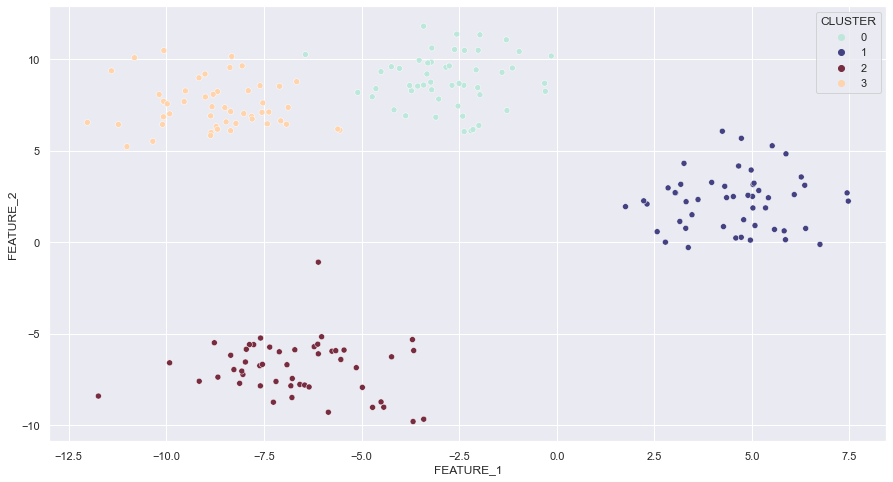

In [5]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x='FEATURE_1',
               y='FEATURE_2',
               data=df,
               hue='CLUSTER',
               palette='icefire')

Bom, vejamos o que temos acima! Criamos um dataset que possui 4 diferentes agrupamentos relativamente bem definidos. Agora, o que vamos fazer é tentar replicar esses agrupamentos utilizando o **KMeans Clustering**.

E o algoritmo vai fazer isso da seguinte forma:
- 1: Todos os pontos serão agrupados de forma completamente aleatória!
- 2: É calculado a *centróide* de cada um dos agrupamentos, e isso, nada mais é, do que a média.
- 3: Vemos a distância de cada um dos pontos para cada uma das centróides e classificamos eles de acordo com a proximidade
- 4: Com base nisso, novas centróides são criadas.
- 5: O processo se repete até por um número máximo de vezes, até que os pontos parem de mudar de classificação!

Vamos tentar ver isso na prática:

In [6]:
kmc = KMeans(n_clusters=4) 
# Aqui já sabemos que temos 4 clusters, mas isso pode não ser verdade em outros casos, 
# e vou mostrar o que fazer nesses outros casos

In [7]:
kmc.fit_predict(df[['FEATURE_1', 'FEATURE_2']])

array([2, 3, 3, 3, 1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 0, 3, 1, 1, 1, 1,
       3, 0, 3, 0, 0, 1, 0, 2, 1, 1, 3, 3, 0, 2, 3, 2, 3, 0, 1, 0, 1, 1,
       3, 2, 2, 1, 2, 0, 3, 0, 3, 2, 0, 0, 1, 1, 0, 2, 3, 2, 1, 3, 3, 1,
       2, 0, 3, 0, 0, 3, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 3, 3, 3, 3, 0,
       2, 3, 1, 0, 2, 2, 2, 3, 0, 2, 1, 0, 3, 3, 0, 1, 0, 2, 3, 1, 1, 3,
       2, 1, 0, 3, 0, 3, 3, 0, 0, 0, 3, 1, 2, 3, 3, 2, 0, 2, 2, 0, 1, 1,
       0, 3, 3, 2, 1, 1, 0, 1, 2, 0, 3, 2, 2, 0, 2, 3, 1, 1, 0, 3, 2, 3,
       1, 3, 3, 2, 2, 2, 0, 2, 2, 3, 0, 1, 2, 2, 1, 2, 3, 0, 1, 1, 2, 1,
       2, 0, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2, 2, 0, 0, 1, 3, 3, 0, 3, 2, 0,
       1, 2])

Acima eu rodei o algoritmo do KMC e veja que ele já nos retornou um array com a classificação de cada um dos pontos, vamos dar uma olhada em como o algoritmo se comportou:

In [8]:
df['CLUSTER_KMC'] = kmc.fit_predict(df[['FEATURE_1', 'FEATURE_2']])

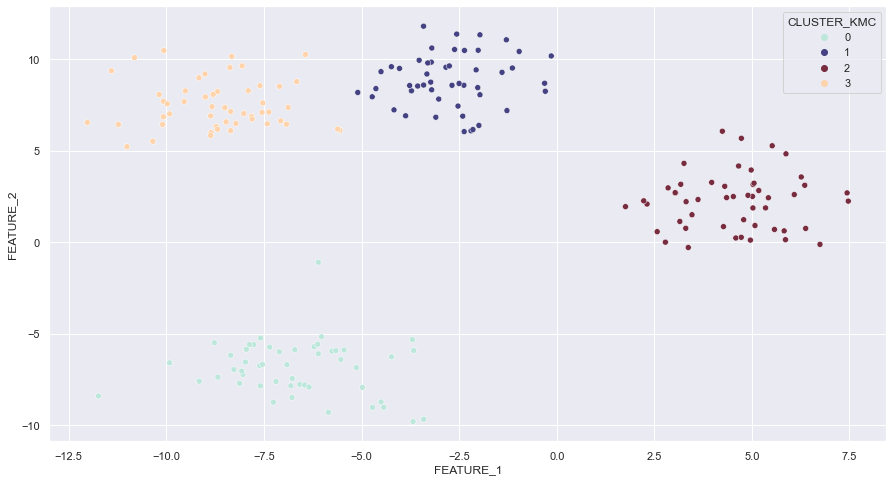

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x='FEATURE_1',
               y='FEATURE_2',
               data=df,
               hue='CLUSTER_KMC',
               palette='icefire')

Veja que, ao menos superficialmente, o KMC se comportou de forma bem satisfatória, conseguindo separar os clusters de forma bem definida e bem parecido com o que vimos no nosso dataset original.

Agora, vale uma ressalva: veja que não estamos plotando matriz de confusão ou fazendo análises de performance, isso porque o KMC é um algoritmo **não supervisionado**, ou seja, quando estivermos aplicando ele, na maioria das vezes, em casos práticos, não teremos com o que comparar, e teremos meio que simplesmente "aceitar" o output do modelo! Ou seja, vamos usar quando quisermos agrupar dados que não estão rotulados, diferentemente, por exemplo, de quando usamos o KNN!

**Para você ver exatamente como o algoritmo foi iterando para chegar nesse resultado, vou deixar um [link](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) que mostra exatamente o processo iterativo do KMC de uma forma muito legal!**

Agora, vamos partir para um exemplo mais concreto porque existem mais alguns pontos a serem tratados...

### Outra aplicação do KMC:

Para esse outro exemplo, vou mostrar um outro dataset bem simples que eu adaptei [desse github](https://github.com/codebasics/py/blob/master/ML/13_kmeans/income.csv). E, basicamente a diferença que veremos aqui é que não temos uma clusterização prévia, e que não temos certeza de quantos clusters devemos criar. Além disso, por se tratar de um caso que pretente simular uma situação mais real, teremos que fazer uma mínima análise prévia e pré-processamento dos dados. 

In [22]:
# Vou importar os dados
df = pd.read_excel("Dados_Renda.xlsx")
df.head()

,ID,IDADE,RENDA
0,1,27,122500
1,2,29,157500
2,3,29,106750
3,4,28,105000
4,5,42,262500


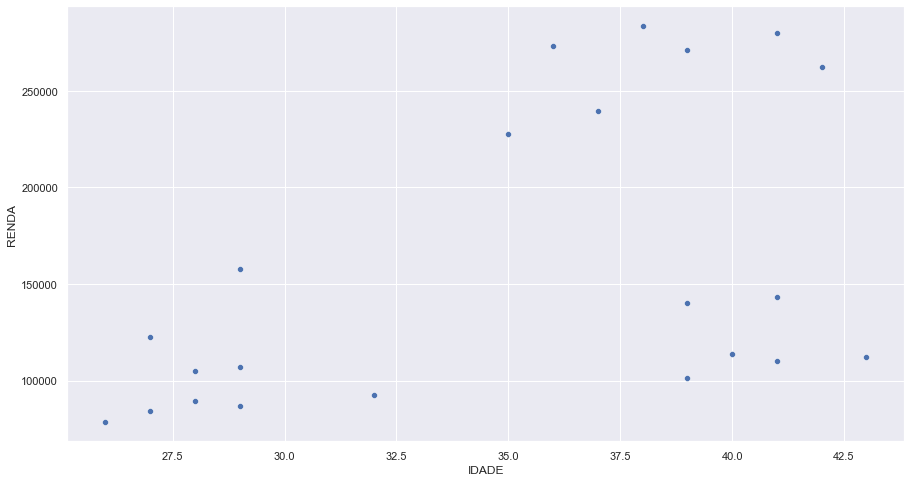

In [23]:
sns.scatterplot(data=df,
               x='IDADE',
               y='RENDA')

Hmmm... Olhando superficialmente, parece que nossos dados poderiam ser divididos em 3 clusters, mas só conseguimos verificar isso, porque, como eu disse, estamos trabalhando com um dataset beeeem simples, imagine se tivéssemos 15 ou mais variáveis explicativas e uma amostra de 50k pontos. Nesse caso, ficaria impossível fazer a análise no "olho", portanto, por mais que talvez essa assunção seja relativamente aceitável, não levarei isso em consideração e vou mostrar como que conseguimos usar uma técnica para definir o número de clusters posteriormente.

Assim como fiz em outros notebooks, vou começar mostrando um exemplo do que **não** se deve fazer, que seria simplesmente pegar um dataset, não realizar nenhum pré-processamento ou análise dos dados e sair aplicando algum modelo...

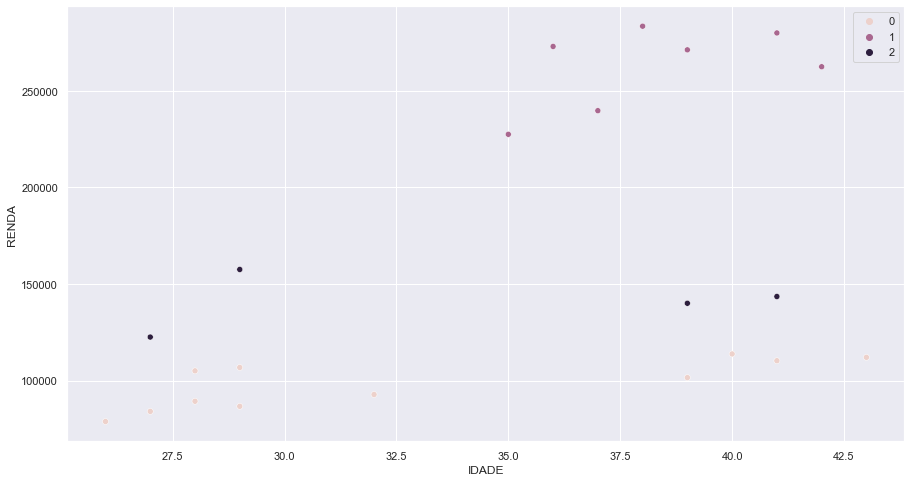

In [26]:
kmc = KMeans(n_clusters=3)
kmc_clusters = kmc.fit_predict(df)
sns.scatterplot(data=df,
               x='IDADE',
               y='RENDA',
               hue=kmc_clusters)

Hmmmm... Parece que algo de errado não está certo... Veja que a divisão dos clusters ficou meio estranha...

Agora vou mostrar o que deveríamos ter feito, no mínimo:

In [25]:
# Vou fazer um describe dos nossos dados e já vou matar o problema:

df.describe()

,ID,IDADE,RENDA
count,22.000000,22.000000,22.000000
mean,11.500000,34.818182,158255.681818
std,6.493587,5.901060,76135.437721
min,1.000000,26.000000,78750.000000
25%,6.250000,29.000000,102375.000000
50%,11.500000,36.500000,118125.000000
75%,16.750000,39.750000,236687.500000
max,22.000000,43.000000,283500.000000


Ok, vamos parar pra pensar agora nos nossos dados, vou passar coluna a coluna:
- **ID**: Essa coluna não só pode, como deve, ser retirada de nosso conjunto de variáveis explicativas, por se tratar apenas do ID de um indíviduo, ou seja, se trata de algo que não deve ter influência nenhuma na resposta de nosso modelo e pode acabar produzindo uma poluição nos dados
- **IDADE**: Se trata, obviamente, da idade do indivíduo, possui valores mínimos e máximos que fazem sentido, parece que estamos analisando um conjunto de indivíduos jovens.
- **RENDA**: Se trata da renda anual de cada indivíduo da nossa base... E, opa, parece que é aí que está o problema... Não está nessa coluna em si, mas veja como a média da coluna renda é muito maior do que a média da coluna idade, e isso faz sentido!

Ou seja, se você leu os outros notebooks meus, e principalmente o de KNN, já deve ter imaginado que o que está faltando em nosso dataset é a **normalização dos dados**. Assim como o KNN, o KMC é um algoritmo que trabalha com a **distância cartesiana** entre pontos, portanto, a normalização dos dados é um passo obrigatório para obter resultados corretos!

*obs.: no primeiro exemplo, do meu dataset gerado pelo `sklearn` eu não normalizei os pontos porque, além de eu não querer misturar os assuntos, as nossas features estavam em escalas semelhantes, mas, em casos práticos, você deve realizar o passo da normalização.*

Vou usar o `MinMaxScaler()` para deixar as *features* entre 0 e 1:

In [28]:
# Então, bora normalizar nossos dados:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['RENDA']])
df['RENDA_NORMALIZADA'] = scaler.transform(df[['RENDA']])

scaler.fit(df[['IDADE']])
df['IDADE_NORMALIZADA'] = scaler.transform(df[['IDADE']])

df.head()

,ID,IDADE,RENDA,RENDA_NORMALIZADA,IDADE_NORMALIZADA
0,1,27,122500,0.213675,0.058824
1,2,29,157500,0.384615,0.176471
2,3,29,106750,0.136752,0.176471
3,4,28,105000,0.128205,0.117647
4,5,42,262500,0.897436,0.941176


E veja que, visualmente os dados tem a mesma cara:

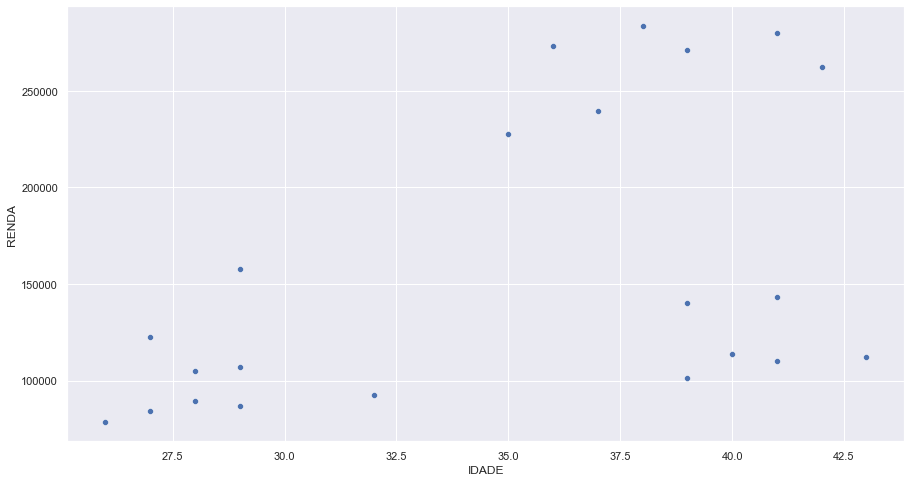

In [29]:
sns.scatterplot(data=df,
               x='IDADE',
               y='RENDA')

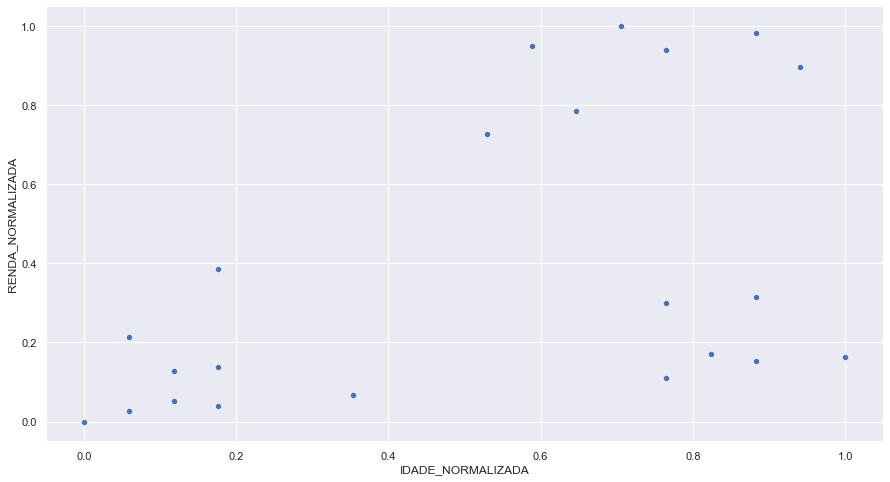

In [30]:
sns.scatterplot(data=df,
               x='IDADE_NORMALIZADA',
               y='RENDA_NORMALIZADA')

Porém, se rodarmos o algoritmo com o dataset normalizado:

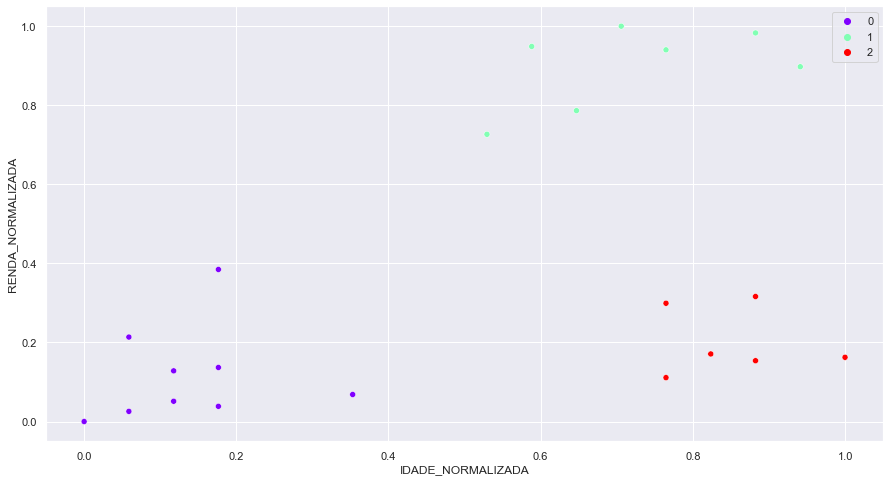

In [33]:
kmc = KMeans(n_clusters=3)
kmc_clusters = kmc.fit_predict(df[['IDADE_NORMALIZADA', 'RENDA_NORMALIZADA']])
sns.scatterplot(data=df,
               x='IDADE_NORMALIZADA',
               y='RENDA_NORMALIZADA',
               hue=kmc_clusters,
               palette='rainbow')

Veja que nossos clusters parecem fazer muito mais sentido agora!!!

### Técnica do Cotovelo:

Porém, como eu já havia dito, decidimos meio que "no olho" a nossa quantidade de clusters, e isso é longe do ideal visto que na maioria das situações da vida real isso seria, no mínimo, nada prático e, no máximo, impossível. Então podemos aplicar uma técnica chamada **técnica do cotovelo** para nos ajudar a decidir a quantidade de clusters!

Porém, para eu explicar essa técnica, vamos voltar um pouco ao teórico...

Anteriormente, eu expliquei que na definição dos clusters, o algoritmo calcula a SQR (Soma dos Quadrados dos Resíduos) de cada cluster, então, é razoável pensar que exista uma SQR global do modelo, que nada mais é do que a somatória dos SQRs de cada um dos clusters!

Conforme aumentamos o número de clusters, o SQR global do modelo sempre vai diminuir, porque, naturalmente, as distâncias dos pontos para as centróides ficam menores conforme colocamos mais centróides. Ou seja, se aumentarmos o número de clusters indefinidamente, a SQR sempre vai diminuir. Porém, colocar clusters indefinidamente no nosso modelo acaba derrotando totalmente o propósito de realizar o agrupamento no primeiro lugar.

E o que acontece é o seguinte, a diminuição do SQR vai diminuindo conforme aumentamos o número de clusters, ou seja, o nosso "ganho" é cada vez menor. O que a **técnica do cotovelo** fala pra fazermos, de forma simples, é parar de aumentar a quantidade de clusters uma vez que esse ganho para de ser significativo, ou seja, paramos quando ver o "cotovelo" do seguinte gráfico:

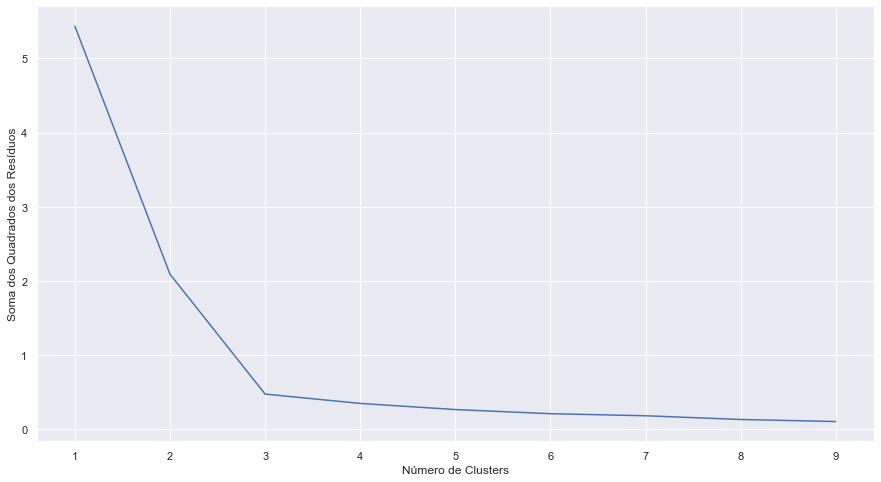

In [36]:
sqr = []

n_clusters = range(1, 10)

for k in n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(df[['IDADE_NORMALIZADA','RENDA_NORMALIZADA']])
    sqr.append(km.inertia_)
    
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados dos Resíduos')
plt.plot(n_clusters, sqr)

Veja o seguinte no gráfico acima, a partir do momento que colocamos mais do que 3 clusters, a redução do SQR começa a ser bem pequena, e o "cotovelo" do gráfico se encontra justamente nesse ponto! Isso nos diz que, por essa técnica, devemos realmente escolher K=3!

**Porém, aqui cabe mais uma ressalva**: Não necessariamente esse vai ser o número "correto" de clusters. Essa técnica é apenas um auxílio nos momentos em que você não faz ideia de quantos clusters existem no seus dados, porém, como eu já disse nos outros notebooks, a definição do K no KMC vai também ser influenciada pelo seu conhecimento com os dados com os quais você está trabalhando!

## Conclusão

Bom, espero que eu consiga ter passado uma boa noção sobre a lógica por trás do KMC e de como colocar esse algoritmo em prática.

Sinta-se livre para entrar em contato comigo em caso de dúvida ou de sugestões!

Criado por:


Reddit: **u/_jvsm**

## Referência (em inglês):

[Tutorial no YT sobre a aplicação do KMC](https://www.youtube.com/watch?v=EItlUEPCIzM)

[Vídeo no YT explicando a lógica por trás do KMC](https://www.youtube.com/watch?v=4b5d3muPQmA)

[Blog Excelente com a visualização do KMC e algumas explicações](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)